In [32]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from torch import nn

In [33]:
# 读入数据
data = pd.read_csv("./dataset/Income1.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30 non-null     int64  
 1   Education   30 non-null     float64
 2   Income      30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [34]:
data.head(5)
# 名字那一列是没用的

,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410
3,4,11.244147,21.169841
4,5,11.645485,15.192634


Text(0, 0.5, 'Income')

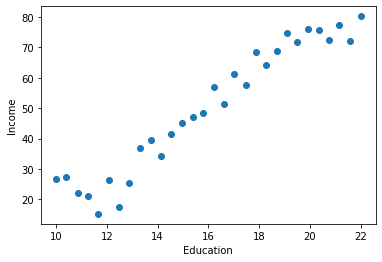

In [35]:
# 画出散点图
plt.scatter(data.Education,data.Income)
plt.xlabel("Education")
plt.ylabel("Income")

In [36]:
model = nn.Linear(1,1)
# 这是随机初始化出来的函数
model.state_dict()

OrderedDict([('weight', tensor([[0.1461]])), ('bias', tensor([0.8758]))])

In [37]:
loss_fn = nn.MSELoss()

In [38]:
X = torch.from_numpy(data.Education.values.reshape(-1,1)).type(torch.FloatTensor)
Y = torch.from_numpy(data.Income.values.reshape(-1,1)).type(torch.FloatTensor)
opt = torch.optim.SGD(model.parameters(),lr=0.001)

In [39]:
for epoch in range(5000):
    for x,y in zip(X,Y):
        # 一行一个batch size, 所以一行梯度一清理,这次集散的梯度和下次的无关,是调整过后
        y_pred = model(x)
        loss = loss_fn(y,y_pred)
        # 这三项的顺序必须是 梯度清零, 反向传播,梯度下降优化
        opt.zero_grad()
        loss.backward()
        opt.step()

In [40]:
model.state_dict()

OrderedDict([('weight', tensor([[5.1265]])), ('bias', tensor([-32.6932]))])

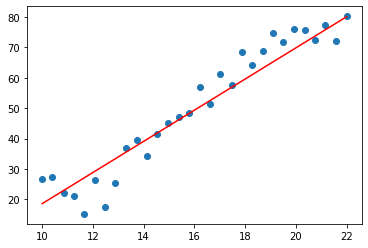

In [41]:
plt.scatter(data.Education,data.Income)
plt.plot(X.numpy(),model(X).data.numpy(),c="r")

## 分解写法

In [42]:
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

模型的公式:w@x+b

In [43]:
learn_rate = 0.0001

In [45]:
for epoch in range(5000):
    for  x,y in zip(X, Y):
        y_pred = torch.matmul(x, w) + b
        # 计算损失
        loss  = (y-y_pred).pow(2).sum()
        # 清零梯度
        if not w.grad is None:
            w.grad.data.zero_()
        if not  b.grad is None:
            b.grad.data.zero_()
        # backward()
        loss.backward()
        # opt.step()
        with torch.no_grad():
            w.data -= w.grad.data * learn_rate
            b.data -= b.grad.data * learn_rate

In [46]:
w,b

(tensor([4.9744], requires_grad=True), tensor([-28.3664], requires_grad=True))

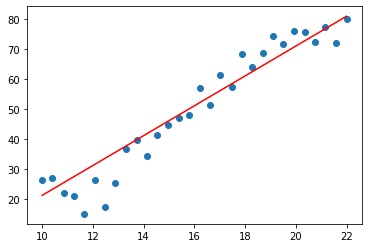

In [47]:
plt.scatter(data.Education, data.Income)
plt.plot(X.numpy(), (torch.matmul(X, w) + b).data.numpy(), c='r')